In [1]:
import os, json
import numpy as np
from emilys.image.arrayplot import arrayplot2d
from emilys.image.polar import polar_resample, polar_rebin

In [2]:
with open('../data/STO_110_5x7_60_keV_px003_py012_pdif_tot.json') as f:
    dict_sim = json.load(f)
l_data_in = np.fromfile('../data/' + dict_sim['file'], dtype = dict_sim['dtype']).reshape(dict_sim['dim'])
i_org = [dict_sim['dim'][1]>>1, dict_sim['dim'][2]>>1]
l_data = np.roll(l_data_in, i_org, axis=(1,2))
del l_data_in
ndim = dict_sim['dim'][1:3]
sc_yx = np.array([dict_sim['sim']['params']['super_cell']['b'], dict_sim['sim']['params']['super_cell']['a']])
samp_yx = 1./sc_yx
sc_z = dict_sim['sim']['params']['super_cell']['c']
sc_nz = dict_sim['sim']['params']['grid']['sampling'][0]
out_dz = sc_z / sc_nz * dict_sim['sim']['params']['output']['step_z']
l_z = np.arange(0, dict_sim['dim'][0]) * out_dz

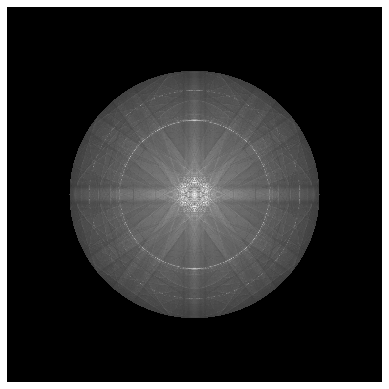

In [3]:
arrayplot2d(l_data[8]**0.2);

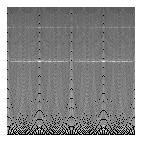

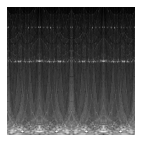

In [4]:
# setup polar grid
num_rad = 128
num_phi = 128
rng_rad = np.array([0.05, 0.66]) * min(samp_yx) * min(ndim) * 0.5
# make a test rebinning
pb = polar_rebin(l_data[8], num_rad, num_phi, i_org, rng_rad, image_scale=np.flip(samp_yx))
arrayplot2d(pb**0.2);
# make a test resampling
pr = polar_resample(l_data[8], num_rad, num_phi, i_org, rng_rad, image_scale=np.flip(samp_yx))
arrayplot2d(pr**0.2);